# Filtering sketchy probes
### by criteria, or publication source, or sex-linked, or array-controls.

In [1]:
import methylcheck
import methylprep

## Available probe exclusion lists
We've imported lists of methylation probes that various researchers have previously deemed to be "sketchy." You can use `methylcheck` to remove these probes -- by referring to the list by the publication's first author name, or by the reason these probes should be excluded from analysis.


In [10]:
criteria = ['Chen2013', 'Price2013', 'Naeem2014', 'DacaRoszak2015',
            'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']
EPIC_criteria = ['McCartney2016', 'Zhou2016', 'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']

print('450k')
for crit in criteria:
    print(crit, '--', len(methylcheck.list_problem_probes('450k', [crit])))
print('EPIC')
for crit in EPIC_criteria:
    print(crit, '--', len(methylcheck.list_problem_probes('EPIC', [crit])))

# Reason -- number of probes

450k
Chen2013 265410
Price2013 213246
Naeem2014 128695
DacaRoszak2015 89678
Polymorphism 289952
CrossHybridization 92524
BaseColorChange 359
RepeatSequenceElements 96631
EPIC
McCartney2016 -- 326267
Zhou2016 -- 178671
Polymorphism -- 346033
CrossHybridization -- 108172
BaseColorChange -- 406
RepeatSequenceElements -- 0


## Processing and filtering

In [3]:
# start withthe folder of idats for some experiment
filepath = "example_data/GSE69852/"
# generate a dataframe of beta values for these samples with pipeline.
df = methylprep.run_pipeline(filepath, betas=True)

INFO:methylprep.processing.pipeline:Running pipeline in: example_data/GSE69852/
Getting raw datasets: 100%|██████████| 6/6 [00:00<00:00, 16215.09it/s]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450_15017482_v1-2.CoreColumns.csv
Processing samples: 100%|██████████| 6/6 [00:49<00:00,  8.26s/it]
INFO:methylprep.processing.pipeline:[finished SampleDataContainer processing]
INFO:methylprep.processing.pipeline:saved beta_values.pkl
INFO:methylprep.processing.pipeline:saved noob_meth_values.pkl
INFO:methylprep.processing.pipeline:saved noob_unmeth_values.pkl
INFO:methylprep.processing.pipeline:Exported meta data to sample_sheet_meta_data.pkl


In [4]:
df.head()

,9247377093_R02C01,9247377085_R04C02,9247377093_R02C02,9247377093_R05C01,9247377093_R03C01,9247377093_R06C02
IlmnID,,,,,,
cg00035864,0.236245,0.308131,0.161785,0.239332,0.287544,0.318018
cg00061679,0.427210,0.525117,0.549514,0.523001,0.395494,0.456512
cg00063477,0.929042,0.932729,0.931465,0.930213,0.927133,0.940223
cg00121626,0.481074,0.329998,0.313115,0.403864,0.357296,0.328795
cg00223952,0.044032,0.022197,0.022282,0.027154,0.040059,0.038421


### To obtain a probe_list for filtering, specify the array type ('450k' in this example) and one or more reasons (as a list).


Of 485512 probes, 290858 matched, yielding 194654 probes after filtering.


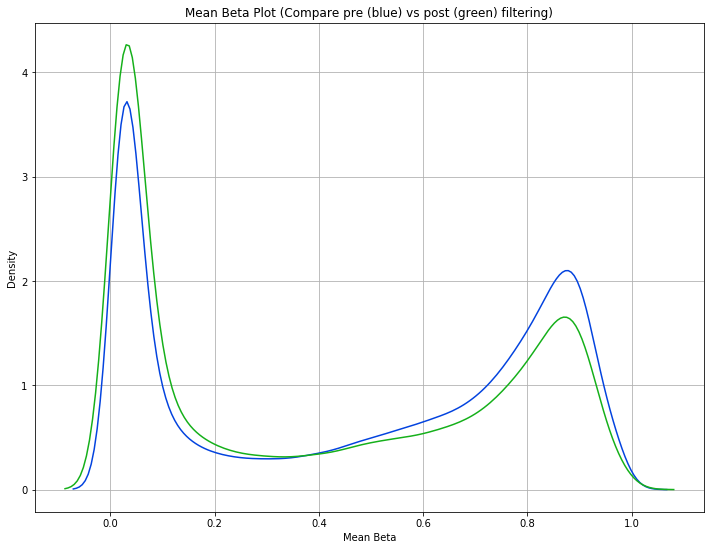

In [5]:
sketchy_probes_list = methylcheck.list_problem_probes('450k', ['Chen2013','Polymorphism'])
df2 = methylcheck.exclude_probes(df, sketchy_probes_list)
methylcheck.mean_beta_compare(df,df2)

Note: Using the `methylcheck.beta_compare` function is the easiest way to see the effects of excluding groups of probes.

### Be careful -- you can apply the a probe list for EPIC to a 450k dataset, and it will work, but won't be good filtering.

Of 485512 probes, 151418 matched, yielding 334094 probes after filtering.


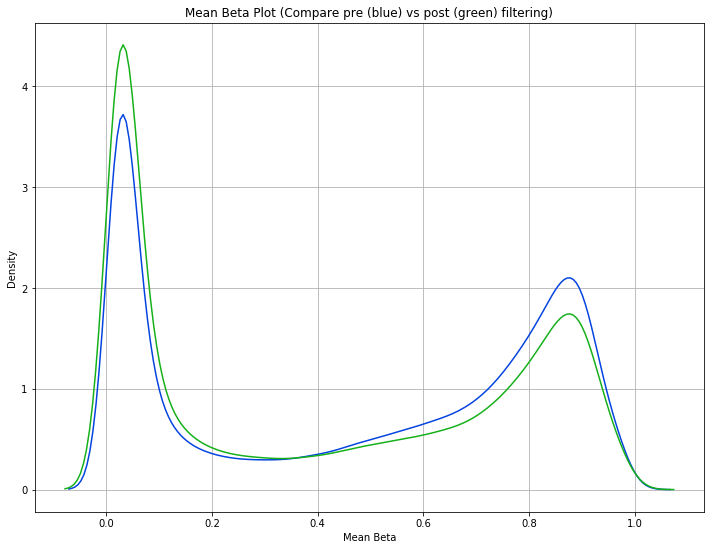

In [6]:
sketchy_probes_list = methylcheck.list_problem_probes('EPIC', ['McCartney2016'])
df2 = methylcheck.exclude_probes(df, sketchy_probes_list)
methylcheck.mean_beta_compare(df,df2)

### Maximum filtering happens by default. 
Passing no criteria into `methylcheck.exclude_probes` will exclude all probes that others have recommended.

Of 485512 probes, 341057 matched, yielding 144455 probes after filtering.


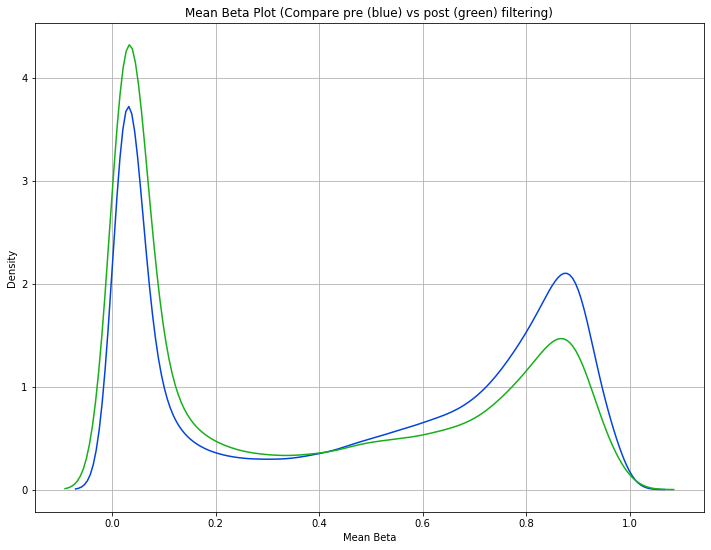

In [8]:
sketchy_probes_list = methylcheck.list_problem_probes('450k')
df3 = methylcheck.exclude_probes(df, sketchy_probes_list)
methylcheck.mean_beta_compare(df,df3)

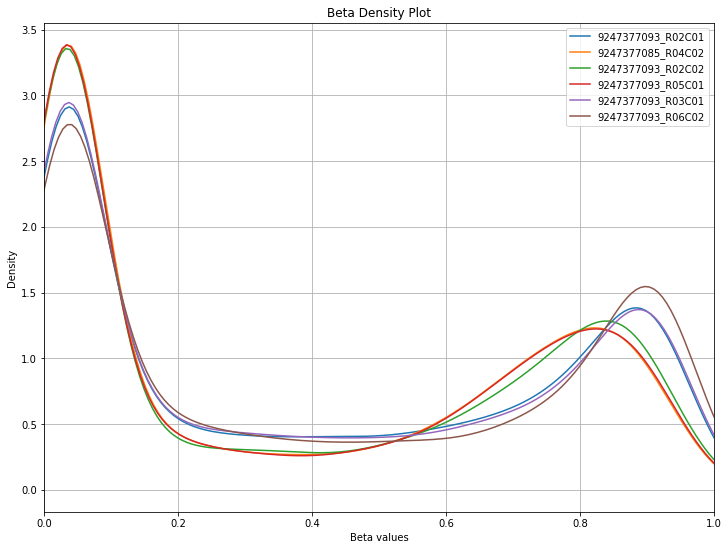

In [9]:
#underlying samples
methylcheck.beta_density_plot(df3)

#### Take a look at other quality control methods, such as MDS and cumulative_sum found in other example notebooks.